<center>
    <img src="https://img.evbuc.com/https%3A%2F%2Fcdn.evbuc.com%2Fimages%2F53691183%2F257316737287%2F1%2Foriginal.jpg?w=800&auto=compress&rect=0%2C0%2C2160%2C1080&s=74711a2a8c51eb0f3bd59e5d482fdc07" width="50%">
</center>

----------

<h1 align="center"> Twitter Sentiment Analysis </h1>
<br>
<center align="left"> <font size='4'>  Developed by: </font> <img src="https://s3.amazonaws.com/weclouddata/images/logos/wcd_logo.png" width="20%">
</center>
<br>
<center align="left"> <font size='4' color='#FF5713'> Accelerating your data science career! </font></center>
<br>

---------

# Sentiment Analysis

> The use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information.


Demo: https://azure.microsoft.com/en-ca/services/cognitive-services/text-analytics/

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('tweets.csv')

df.head()

,id,created_at,text,location
0,1083193473539420160,2019-01-10 02:47:03,@CIBC please explain to me why I want to remai...,Canada
1,1083191479215026176,2019-01-10 02:39:08,"RT @CIBCLiveLabs: We are pleased to announce, ...","Oshawa, Ontario"
2,1083184422709575683,2019-01-10 02:11:05,CIBC World Markets Inc. Decreases Holdings in ...,The Netherlands
3,1083182915826126848,2019-01-10 02:05:06,Le patron de la Banque @cibc s’attend à un ral...,Montréal
4,1083177871881818112,2019-01-10 01:45:03,Your home is a valuable asset. Use your equity...,"Lower Mainland, BC"


# Getting Labels

To perform sentiment analysis and build a model, we would need to label each tweet with its sentiment. To do this, we could manual label the data ourselves by reading each tweet and assigning a positive or negative sentiment. This would be a long and tedious process. A better solution would be to outsource this process by paying for a service such as Amazon Mechanical Turk.

> Amazon Mechanical Turk (MTurk) is a crowdsourcing marketplace that makes it easier for individuals and businesses to outsource their processes and jobs to a distributed workforce who can perform these tasks virtually. This could include anything from conducting simple data validation and research to more subjective tasks like survey participation, content moderation, and more. MTurk enables companies to harness the collective intelligence, skills, and insights from a global workforce to streamline business processes, augment data collection and analysis, and accelerate machine learning development.

https://www.mturk.com/

For our project, we're going to simulate this process by using `TextBlob` to assign the labels. We'll then train a machine learning model to see if we can get similar performance.

https://textblob.readthedocs.io/en/dev/

In [5]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

In [6]:
df['sentiment'] = df['text'].apply(get_sentiment)

In [7]:
df.head()

,id,created_at,text,location,sentiment
0,1083193473539420160,2019-01-10 02:47:03,@CIBC please explain to me why I want to remai...,Canada,neutral
1,1083191479215026176,2019-01-10 02:39:08,"RT @CIBCLiveLabs: We are pleased to announce, ...","Oshawa, Ontario",positive
2,1083184422709575683,2019-01-10 02:11:05,CIBC World Markets Inc. Decreases Holdings in ...,The Netherlands,neutral
3,1083182915826126848,2019-01-10 02:05:06,Le patron de la Banque @cibc s’attend à un ral...,Montréal,neutral
4,1083177871881818112,2019-01-10 01:45:03,Your home is a valuable asset. Use your equity...,"Lower Mainland, BC",positive


# Twitter EDA and Feature Engineering

Now that we have our data let's explore and analyze it. This is known as **exploratory data analysis** or **EDA**.

> exploratory data analysis (EDA) is an approach analyzing data sets to summarize their main characteristics, often with visual methods.

https://en.wikipedia.org/wiki/Exploratory_data_analysis

--------

We can then manipulate the data to create **features** for our machine learning model.

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. Feature engineering is fundamental to the application of machine learning, and is both difficult and expensive. The need for manual feature engineering can be obviated by automated feature learning. Feature engineering is an informal topic, but it is considered essential in applied machine learning.

"Coming up with features is difficult, time-consuming, requires expert knowledge. "Applied machine learning" is basically feature engineering."

— Andrew Ng, Machine Learning and AI via Brain simulations[1]

https://en.wikipedia.org/wiki/Feature_engineering

## Exercise - Data exploration

- Read in the tweets data using `pandas`
- Explore the data

Some ideas of things to look for:
- the dimensions of the data
- get DataFrame info
- get summary statistics
- get the value counts of categoric columns
- count missing values

In [21]:
df.head()

,id,created_at,text,location
0,1083193473539420160,2019-01-10 02:47:03,@CIBC please explain to me why I want to remai...,Canada
1,1083191479215026176,2019-01-10 02:39:08,"RT @CIBCLiveLabs: We are pleased to announce, ...","Oshawa, Ontario"
2,1083184422709575683,2019-01-10 02:11:05,CIBC World Markets Inc. Decreases Holdings in ...,The Netherlands
3,1083182915826126848,2019-01-10 02:05:06,Le patron de la Banque @cibc s’attend à un ral...,Montréal
4,1083177871881818112,2019-01-10 01:45:03,Your home is a valuable asset. Use your equity...,"Lower Mainland, BC"


In [22]:
df.shape

(1951, 4)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951 entries, 0 to 1950
Data columns (total 4 columns):
id            1951 non-null int64
created_at    1951 non-null object
text          1951 non-null object
location      1509 non-null object
dtypes: int64(1), object(3)
memory usage: 61.0+ KB


In [24]:
df.describe(include='all')

,id,created_at,text,location
count,1.951000e+03,1951,1951,1509
unique,NaN,1924,1768,428
top,NaN,2019-01-08 20:15:59,RT @NHLBlackhawks: Staying warm never looked s...,Canada
freq,NaN,4,25,355
mean,1.081534e+18,NaN,NaN,NaN
std,1.119672e+15,NaN,NaN,NaN
min,1.079519e+18,NaN,NaN,NaN
25%,1.080581e+18,NaN,NaN,NaN
50%,1.081338e+18,NaN,NaN,NaN
75%,1.082675e+18,NaN,NaN,NaN


In [25]:
df['location'].value_counts()

Canada                            355
Toronto, Ontario                   74
The Caribbean                      64
Toronto                            57
Jamaica                            35
United States                      31
Barbados                           24
Vancouver, British Columbia        21
Bahamas                            20
Edmonton, Alberta                  18
Calgary, Alberta                   15
Sioux Falls, SD                    15
Ontario, Canada                    12
Chicago, IL                        10
Bay Street and Howe Street         10
Ottawa, Ontario                    10
Toronto, Canada                     9
London, Ontario                     9
St. Albert, Alberta                 9
Winnipeg, Manitoba                  9
Corner Brook, NL                    8
Worldwide                           8
Caen, France                        7
London                              7
Chicago                             7
Toronto, Ontario, Canada            7
Oshawa, Onta

In [26]:
df.isnull().sum()

id              0
created_at      0
text            0
location      442
dtype: int64

## Exercise - Create features from datetime

- Check the type of the `created_at` column
- Convert the `created_at` column to a `datetime` type
- Create a new column called `hour` with the hour from `created_at`
- Create a new column called `day_of_week` with the `dayofweek` from `created_at`

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951 entries, 0 to 1950
Data columns (total 4 columns):
id            1951 non-null int64
created_at    1951 non-null object
text          1951 non-null object
location      1509 non-null object
dtypes: int64(1), object(3)
memory usage: 61.0+ KB


In [11]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [12]:
df['hour'] = df['created_at'].dt.hour

In [13]:
df['day_of_week'] = df['created_at'].dt.dayofweek

## Exercise - Dealing with text data

Pandas has many methods for working with text data. We can use these to create features from our tweet text.

A full list of these string methods can be found at: https://pandas.pydata.org/pandas-docs/stable/text.html

- Create a new column called `num_chars` that is the number of characters in each tweet
- Create a new column called `num_words` that is a count of how many words in each tweet 
- Create a new column called `num_ats` that is a count of how many `@` symbols in each

In [14]:
df['num_chars'] = df['text'].str.len()

In [15]:
df['num_words'] = df['text'].str.count(' ') + 1

In [16]:
df['num_ats'] = df['text'].str.count('@')

## Exercise - Positive and negative words count

Sometimes we might want to use external data to help build features. Here we count how positive and negative words there are in each tweet by comparing them to a predefined list of words.

We borrow our list of pos/neg words from this study: https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html

In [17]:
pos_words = pd.read_csv('positive-words.txt', skiprows=35, names=['words'])
pos_words = pos_words['words'].values.tolist()

pos_words

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [18]:
neg_words = pd.read_csv('negative-words.txt', skiprows=35, names=['words'])
neg_words = neg_words['words'].values.tolist()

neg_words

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',


In [21]:
def count_words(tweet, words):
    count = 0
    for word in tweet.split():
        if word in words:
            count += 1
    return count

In [22]:
df['pos_count'] = df['text'].apply(count_words, words=pos_words)
df['neg_count'] = df['text'].apply(count_words, words=neg_words)

## Exercise - Analysis and visualization

- Explore the new **features** we've created
- Try and perform your own analysis and see if you can find any interesting insights
- Create some visualizations to further analyze the data

In [23]:
df.describe()

,id,hour,day_of_week,num_chars,num_words,num_ats,pos_count,neg_count
count,1.951000e+03,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000
mean,1.081534e+18,14.713480,2.004100,116.300871,17.208611,0.907740,0.250128,0.195284
std,1.119672e+15,6.368787,1.674847,33.427644,5.826821,1.279301,0.578210,0.467726
min,1.079519e+18,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000
25%,1.080581e+18,12.000000,1.000000,95.000000,13.000000,0.000000,0.000000,0.000000
50%,1.081338e+18,16.000000,2.000000,139.000000,19.000000,1.000000,0.000000,0.000000
75%,1.082675e+18,19.000000,3.000000,140.000000,22.000000,1.000000,0.000000,0.000000
max,1.083193e+18,23.000000,6.000000,148.000000,40.000000,12.000000,4.000000,4.000000


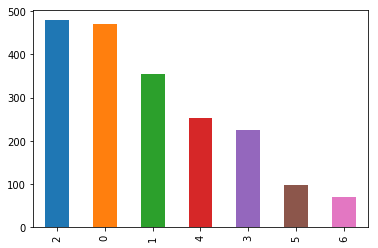

In [24]:
df['day_of_week'].value_counts().plot('bar')

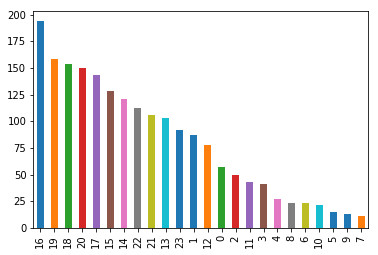

In [25]:
df['hour'].value_counts().plot('bar')

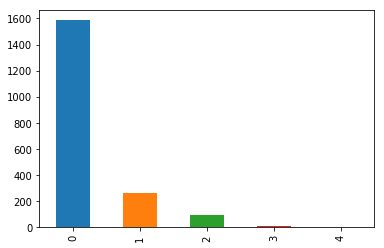

In [26]:
df['pos_count'].value_counts().plot('bar')

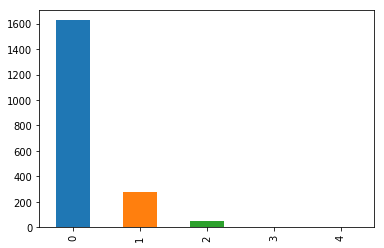

In [27]:
df['neg_count'].value_counts().plot('bar')

## Exercise - Machine Learning

- Get your new features and the label
- Split the data into a training and test set with test_size 0.25 and random_state 2019
- Try training different models and tune their hyperparameters
- Get the model with the highest score

In [29]:
from sklearn.model_selection import train_test_split

X = # Your features
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2019)

In [ ]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))